## Decision Tree with Scikit-Learn

In [1]:
%config InlineBackend.figure_format = 'retina'
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Load the Ionosphere dataset

In [2]:
# Ionosphere dataset.
X_and_Y = np.load('ionosphere.npy').astype(np.float32) # Load data from file.

np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data.
X = X_and_Y[:, 0:-1]            # First column to second last column: Features. 
Y = X_and_Y[:, -1]              # Last column: Labels.
Y[Y==0] = -1                    # Convert labels from {0, 1} to {-1, 1}.

print(X.shape)      # (351, 34)
print(Y.shape)      # (351,)
print(X_and_Y[0])               
# The result should be:
# [ 1.       0.      -0.205    0.2875   0.23     0.1      0.2825   0.3175
#   0.3225   0.35     0.36285 -0.34617  0.0925   0.275   -0.095    0.21
#  -0.0875   0.235   -0.34187  0.31408 -0.48    -0.08     0.29908  0.33176
#  -0.58    -0.24     0.3219  -0.28475 -0.47     0.185   -0.27104 -0.31228
#   0.40445  0.0305   1.     ]

(351, 34)
(351,)
[ 1.       0.      -0.205    0.2875   0.23     0.1      0.2825   0.3175
  0.3225   0.35     0.36285 -0.34617  0.0925   0.275   -0.095    0.21
 -0.0875   0.235   -0.34187  0.31408 -0.48    -0.08     0.29908  0.33176
 -0.58    -0.24     0.3219  -0.28475 -0.47     0.185   -0.27104 -0.31228
  0.40445  0.0305   1.     ]


In [3]:
# Divide the data points into training set and test set.
X_shuffled = X
Y_shuffled = Y
X_train = X_shuffled[:200]          # Shape: (200, 34)
Y_train = Y_shuffled[:200]          # Shape: (200,)
X_test = X_shuffled[200:]           # Shape: (151,4)
Y_test = Y_shuffled[200:]           # Shape: (151,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(200, 34)
(200,)
(151, 34)
(151,)


### Decision Tree Using Scikit-Learn

In [21]:
# Perform grid search for best max depth.

# 1. Create a decision tree classifier.
#    Hint: You can use tree.DecisionTreeClassifier()
#          We use "entropy" as the criterion. The random state should be
#          set to 1 for consistent results. Other options are left at default.
estimator = tree.DecisionTreeClassifier(criterion='entropy',random_state=1)
# 2. Create a grid searcher with cross-validation.
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
#    Hint: You can use GridSearchCV()
#          Please set a 10-fold cross-validation.
grid_search = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=10)
# 3. Use the grid searcher to fit the training set.
#    - This grid searcher will try every max depth in the list. 
#    - For each max depth, a cross-validation is applied to the training set, 
#      that is, it creates several (training subset, validation subset) pairs. 
#      Note: Sometimes the validation subset is called as "test" subset, but it
#            is not the subset of real test set.
#        - For each pair, a decision tree classifier will be trained on the 
#          training subset and evaluated on validation subset.
#        - The average validation scores will be kept.
#    
#    Hint: You can simply use .fit() function of the grid searcher.
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

### Visualize the Results

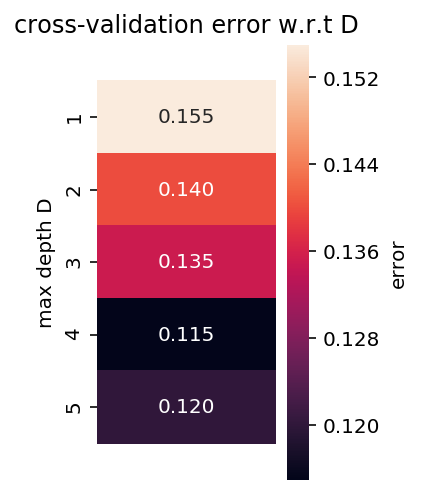

In [22]:
# Draw heatmaps for result of grid search.
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Draw heatmaps of cross-validation errors (in cross-validation).
# Hint: You can use .cv_results_['mean_test_score'] to obtain 
#       cross-validation accuracy (that is, average validation accuracy over 
#       different splits in the cross-validation). You need to convert it 
#       to the error.
#       Note that you need to reshape the results to shape (?, 1), which is 
#       needed by draw_heatmap().
cvAccuracy= grid_search.cv_results_['mean_test_score']
cross_val_errors = 1-cvAccuracy
cross_val_errors=np.reshape(cross_val_errors,(5,1))
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')

In [28]:
# Show the best max depth.
# Hint: You can use the .best_params_ of the grid searcher 
#       to obtain the best parameter(s).
best_max_depth = grid_search.best_params_
print("Best max depth D: {}".format(best_max_depth))
# Calculate the test error.
# Hint: You can use .best_estimator_.predict() to make predictions.
y_pred= grid_search.predict(X_test)
test_error=1 - accuracy_score(Y_test, y_pred)
print("Test error: {}".format(test_error))

Best max depth D: {'max_depth': 4}
Test error: 0.1258278145695364
